# 1.단순선형회귀
> "작성완료"

- toc:true
- branch: master
- badges: true
- comments: true
- [python, Data Science]

---
# Study Info
- lenture: Data Science_1nd week of lectures.
- lenture date: 2022-03-07
- lecturer: Guebin choi
- study date: 2022-03-16
- author: Kione kim
---

- 이번 학기동안 배울 것: DNN(심층신경망), CNN(합성곱신경망), GAN(적대적생성신경망)인데, DNN을 바로 이해하기 어렵다.

- 따라서 다음의 과정을 학습한 후 심층 신경망으로 넘어갈 예정: (선형대수학 $\to$) 회귀분석 $\to$ 로지스틱회귀분석 $\to$ 심층신경망 

### 선형회귀

`-` 카페 예제
- 온도가 높아지면 아이스아메리카노의 판매량이 증가한다는 사실을 알게 되었다.   
- 일기예보를 통해, 온도 $\to$ 아이스아메리카노 판매량 예측을 하고 싶다.

In [36]:
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np

`-` 자료생성

In [37]:
x=tf.constant([20.1,22.2,22.7,23.3,24.4,25.1,26.2,27.3,28.4,30.4])
x

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([20.1, 22.2, 22.7, 23.3, 24.4, 25.1, 26.2, 27.3, 28.4, 30.4],
      dtype=float32)>

x와 y의 관계는 다음과 같이 가정
$${\bf y} \approx 10.2 + 2.2{\bf x}$$

In [38]:
tf.random.set_seed(50000)
epsilon = tf.random.normal([10])
y = 10.2 + 2.2*x + epsilon
y

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([53.68625 , 60.12511 , 58.93714 , 60.65312 , 64.45385 , 66.9807  ,
       67.960144, 70.73565 , 72.87779 , 77.54677 ], dtype=float32)>

In [39]:
x

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([20.1, 22.2, 22.7, 23.3, 24.4, 25.1, 26.2, 27.3, 28.4, 30.4],
      dtype=float32)>

In [40]:
y

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([53.68625 , 60.12511 , 58.93714 , 60.65312 , 64.45385 , 66.9807  ,
       67.960144, 70.73565 , 72.87779 , 77.54677 ], dtype=float32)>

In [41]:
data = tf.transpose(tf.concat([[x],[y]],0))
data

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[20.1     , 53.68625 ],
       [22.2     , 60.12511 ],
       [22.7     , 58.93714 ],
       [23.3     , 60.65312 ],
       [24.4     , 64.45385 ],
       [25.1     , 66.9807  ],
       [26.2     , 67.960144],
       [27.3     , 70.73565 ],
       [28.4     , 72.87779 ],
       [30.4     , 77.54677 ]], dtype=float32)>

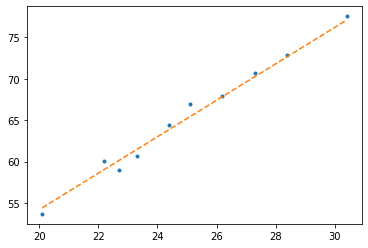

In [42]:
plt.plot(x,y,'.')
plt.plot(x,10.2+2.2*x,'--')

- 파란색 점: 데이터, 주황색 점선: 법칙
- 위 그림을 보니 $x$와 $y$가 선형관계가 있는 것처럼 보인다. 즉 아래의 식을 만족하는 $\beta_0, \beta_1$가 있을 것 같다.
- $y_{i} \approx \beta_1 x_{i}+\beta_0$

In [43]:
data

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[20.1     , 53.68625 ],
       [22.2     , 60.12511 ],
       [22.7     , 58.93714 ],
       [23.3     , 60.65312 ],
       [24.4     , 64.45385 ],
       [25.1     , 66.9807  ],
       [26.2     , 67.960144],
       [27.3     , 70.73565 ],
       [28.4     , 72.87779 ],
       [30.4     , 77.54677 ]], dtype=float32)>

`-` 점원 A는 $\beta_0=15, \beta_1=2$일 것이라고 주장하였고 점원 B는 $\beta_0=15.5, \beta_1=2$일 것이라고 주장하였다.
- 점원 A: $(\beta_0, \beta_1)$ = $(15,2)$ 
- 점원 B: $(\beta_0, \beta_1)$ = $(15.5,2)$

#### 잔차제곱합

`-` $y_{i} \approx \beta_0 + \beta_1$을 최소로 하는 $(\beta_0,\beta_1)$을 찾아보자

`-` 잔체제곱합을 통한 점원 A, 점원 B 추정치 비교 

In [44]:
20.1*2 + 15, 53.68625 

(55.2, 53.68625)

In [45]:
22.2*2 + 15, 60.12511  

(59.4, 60.12511)

In [46]:
20.1*2 + 15.5, 53.68625 

(55.7, 53.68625)

In [47]:
22.2*2 + 15.5, 60.12511 

(59.9, 60.12511)

- $i=1$일 때 점원 A의 주장이 더 잘 맞고 $i=2$일 때 점원 B의 주장이 더 잘 맞는다.

`-` for 문을 사용하여 $\sum_{i=1}^{10} (y_i -\beta_0 -\beta_1 x_i)^2$를 계산하여 비교해보자

In [48]:
sum1=0
for i in range(10):
    sum1=sum1+(y[i]-15-2*x[i])**2

In [49]:
sum2=0
for i in range(10):
    sum2=sum2+(y[i]-15.5-2*x[i])**2

In [50]:
sum1

<tf.Tensor: shape=(), dtype=float32, numpy=15.268475>

In [51]:
sum2

<tf.Tensor: shape=(), dtype=float32, numpy=14.011955>


- 점원 B의 추정치의 잔차제곱합이 조금 더 작다 $\to$ 점원 B의 주장이 더 적합하다   
- 이 과정을 반복하면 최적의 추정치를 계산해낼 수 있을 것 같다.

`-` 그러나 현실적으로 구현하기 어렵다

: 왜냐하면 잔차제곱합이 0이 되지 않는다면, 무엇이 최적의 추정치인지 알 수 없다. 잔차제곱합이 0이 아니라면 항상 더 적합한 추정치가 있을 수도 있기 때문

`-` 수식을 활용하여 찾아볼 수 있다

$\sum_{i=1}^{10} (y_i -\beta_0 -\beta_1 x_i)^2$를 최소화하는 $\beta_0, \beta_1$을 찾으면 되는데, 이는 아래와 같이 $\beta_0, \beta_1$으로 각각 편미분하여 연립하여 풀면 된다.

$\begin{cases}
\frac{\partial}{\partial \beta_0}\sum_{i=1}^{10} (y_i -\beta_0 -\beta_1 x_i)^2=0 \\ 
\frac{\partial}{\partial \beta_1}\sum_{i=1}^{10} (y_i -\beta_0 -\beta_1 x_i)^2=0
\end{cases}$

위 연립방정식을 편미분하면 다음과 같이 된다.

$\begin{cases}
\sum_{i=1}^{10} -2(y_i -\beta_0 -\beta_1 x_i)=0 \\ 
\sum_{i=1}^{10} -2x_i(y_i -\beta_0 -\beta_1 x_i)=0
\end{cases}$

이를 정리하면 

$$\hat{\beta}_0= \bar{y}-\hat{\beta}_1 \bar{x}$$

$$\hat{\beta}_1= \frac{S_{xy}}{S_{xx}}=\frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$$

최적의 추정치$(\hat{\beta}_0,\hat{\beta}_1)$를 구할 수 있고 이를 통해 추세선을 그려볼 수 있다

`-` 추정치는 다음과 같이 구할 수 있다.

In [52]:
Sxx = sum((x-np.mean(x))**2)
Sxx

<tf.Tensor: shape=(), dtype=float32, numpy=87.84898>

In [53]:
Sxy = sum((x-np.mean(x))*(y-np.mean(y)))
Sxy

<tf.Tensor: shape=(), dtype=float32, numpy=202.18872>

In [54]:
beta_1_est = Sxy/Sxx
beta_1_est

<tf.Tensor: shape=(), dtype=float32, numpy=2.3015487>

In [55]:
beta_0_est = np.mean(y) - beta_1_est*np.mean(x)
beta_0_est

<tf.Tensor: shape=(), dtype=float32, numpy=7.8339195>

`-` 그림을 그려보자

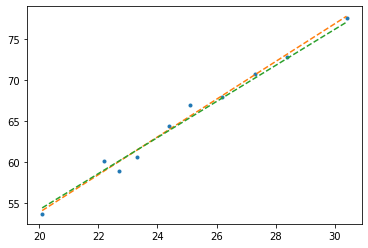

In [56]:
plt.plot(x,y,'.')
plt.plot(x,beta_0_est + beta_1_est*x,'--')
plt.plot(x,10.2+2.2*x,'--') # 세상의 법칙

`-` 샘플수가 커질수록 주황색 선은 점점 초록색 선과 유사해진다.

- 이는 매우 좋은 접근법이지만, 확장성이 떨어진다는 치명적 단점이 있다

`-` 매트릭스를 통해 확장성을 개선할 수 있다

#### 모형의 매트릭스화

`-` 우리의 모형

$y_i = \beta_0 + \beta_1 x_i + \epsilon_i, \quad i=1,2,\dots,10$ 

이를 풀어서 쓰면
    
$\begin{cases}
y_1 = \beta_0 +\beta_1 x_1 + \epsilon_1 \\ 
y_2 = \beta_0 +\beta_1 x_2 + \epsilon_2 \\ 
\dots \\ 
y_{10} = \beta_0 +\beta_1 x_{10} + \epsilon_{10} 
\end{cases}$

아래와 같다.

$\begin{bmatrix} 
y_1 \\ 
y_2 \\ 
\dots \\
y_{10} 
\end{bmatrix} 
= \begin{bmatrix} 
1 & x_1 \\ 
1 & x_2 \\ 
\dots & \dots \\
1 & x_{10} 
\end{bmatrix}\begin{bmatrix}\beta_0 \\ \beta_1 \end{bmatrix} + \begin{bmatrix} 
\epsilon_1 \\ 
\epsilon_2 \\ 
\dots \\
\epsilon_{10} 
\end{bmatrix} $

벡터와 매트릭스 형태로 표현하면

${\bf y} = {\bf X} {\boldsymbol \beta} + \boldsymbol{\epsilon}$

`-` 손실함수의 매트릭스화

$loss=\sum_{i=1}^{n}(y_i-\beta_0-\beta_1x_i)^2$

이를 벡터로 표현하면,

$loss=({\bf y}-{\bf X}{\boldsymbol \beta})^\top({\bf y}-{\bf X}{\boldsymbol \beta})={\bf y}^\top {\bf y} - {\bf y}^\top {\bf X}{\boldsymbol\beta} - {\boldsymbol\beta}^\top {\bf X}^\top {\bf y} + {\boldsymbol\beta}^\top {\bf X}^\top {\bf X} {\boldsymbol\beta}$

`-` 미분하는 과정의 매트릭스화 

loss를 최소화하는 ${\boldsymbol \beta}$를 구해야하므로 loss를 ${\boldsymbol \beta}$로 미분한식을 0이라고 놓고 풀면 된다. 

$\frac{\partial}{\partial \boldsymbol{\beta}} loss = \frac{\partial}{\partial \boldsymbol{\beta}} {\bf y}^\top {\bf y} - \frac{\partial}{\partial \boldsymbol{\beta}} {\bf y}^\top {\bf X}{\boldsymbol\beta} - \frac{\partial}{\partial \boldsymbol{\beta}} {\boldsymbol\beta}^\top {\bf X}^\top {\bf y} + \frac{\partial}{\partial \boldsymbol{\beta}} {\boldsymbol\beta}^\top {\bf X}^\top {\bf X} {\boldsymbol\beta}$ 

$= 0 - {\bf X}^\top {\bf y}- {\bf X}^\top {\bf y} + 2{\bf X}^\top {\bf X} = - 2{\bf X}^\top {\bf y} + 2{\bf X}^\top {\bf X}{\boldsymbol\beta} $

따라서 $\frac{\partial}{\partial \boldsymbol{\beta}}loss=0$을 풀면 아래와 같다. 

$ 2{\bf X}^\top {\bf y} = 2{\bf X}^\top {\bf X}{\boldsymbol\beta}$ 

$ {\bf X}^\top {\bf X}{\boldsymbol\beta} = {\bf X}^\top {\bf y}$ 

$\boldsymbol{\hat\beta}= ({\bf X}^\top {\bf X})^{-1}{\bf X}^\top {\bf y} $

`-` 적용

In [59]:
x=tf.constant([20.1,22.2,22.7,23.3,24.4,25.1,26.2,27.3,28.4,30.4])
x

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([20.1, 22.2, 22.7, 23.3, 24.4, 25.1, 26.2, 27.3, 28.4, 30.4],
      dtype=float32)>

In [60]:
tf.random.set_seed(50000)
epsilon = tf.random.normal([10])
y = 10.2 + 2.2*x + epsilon
y

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([53.68625 , 60.12511 , 58.93714 , 60.65312 , 64.45385 , 66.9807  ,
       67.960144, 70.73565 , 72.87779 , 77.54677 ], dtype=float32)>

`-` 방법 1

In [61]:
tf.concat([[[1]*10],[x]],0)

<tf.Tensor: shape=(2, 10), dtype=int32, numpy=
array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [20, 22, 22, 23, 24, 25, 26, 27, 28, 30]])>

In [62]:
X = tf.transpose(tf.concat([[[1]*10],[x]],0))
X

<tf.Tensor: shape=(10, 2), dtype=int32, numpy=
array([[ 1, 20],
       [ 1, 22],
       [ 1, 22],
       [ 1, 23],
       [ 1, 24],
       [ 1, 25],
       [ 1, 26],
       [ 1, 27],
       [ 1, 28],
       [ 1, 30]])>

`-` 방법 2

In [63]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [68]:
X = tf.concat([[[1.0]*10],[x]],0).T
X

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[ 1. , 20.1],
       [ 1. , 22.2],
       [ 1. , 22.7],
       [ 1. , 23.3],
       [ 1. , 24.4],
       [ 1. , 25.1],
       [ 1. , 26.2],
       [ 1. , 27.3],
       [ 1. , 28.4],
       [ 1. , 30.4]], dtype=float32)>

$\boldsymbol{\hat\beta}= ({\bf X}^\top {\bf X})^{-1}{\bf X}^\top {\bf y} $

`-` 깨알문법
1. 역행렬 `tf.linalg.inv`사용
2.행렬 간 곱 `@` 사용

In [69]:
tf.linalg.inv(X.T @ X) @X.T @y

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([7.834038 , 2.3015506], dtype=float32)>

In [70]:
beta_0_est, beta_1_est

(<tf.Tensor: shape=(), dtype=float32, numpy=7.8339195>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.3015487>)

- 그런데 값이 다르다...?

- 이유는 텐서플로우가 효율적 계산을 위해 조금 대충 계산하기 때문

`-` 텐서플로우 내에 내장되어 있는 텐서플로우용 넘파이를 이용하여 다시 계산해보자

In [71]:
import tensorflow.experimental.numpy as tnp

In [74]:
x=tf.constant([20.1,22.2,22.7,23.3,24.4,25.1,26.2,27.3,28.4,30.4])
x

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([20.1, 22.2, 22.7, 23.3, 24.4, 25.1, 26.2, 27.3, 28.4, 30.4],
      dtype=float32)>

In [75]:
y = 10.2 + 2.2*x + epsilon
y

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([53.68625 , 60.12511 , 58.93714 , 60.65312 , 64.45385 , 66.9807  ,
       67.960144, 70.73565 , 72.87779 , 77.54677 ], dtype=float32)>

`-` 공식을 이용한 풀이

In [77]:
beta1_est = sum((x-np.mean(x))*(y-np.mean(y))) / sum((x-np.mean(x))**2) ## Sxy/Sxx
beta0_est = np.mean(y) - beta1_est * np.mean(x)

In [79]:
beta0_est, beta1_est

(<tf.Tensor: shape=(), dtype=float32, numpy=7.8339195>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.3015487>)

`-` 벡터를 이용한 풀이

In [80]:
X = tnp.concatenate([[tnp.array([1.0]*10)],[x]],0).T
X

<tf.Tensor: shape=(10, 2), dtype=float64, numpy=
array([[ 1.        , 20.10000038],
       [ 1.        , 22.20000076],
       [ 1.        , 22.70000076],
       [ 1.        , 23.29999924],
       [ 1.        , 24.39999962],
       [ 1.        , 25.10000038],
       [ 1.        , 26.20000076],
       [ 1.        , 27.29999924],
       [ 1.        , 28.39999962],
       [ 1.        , 30.39999962]])>

In [81]:
tf.linalg.inv(X.T @ X) @X.T @ y

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([7.83391429, 2.30154889])>

- 거의 유사한 값이 나온다

##### 결론

벡터를 이용하여 `tf.linalg.inv(X.T @ X) @X.T @ y`를 계산하면 바로 $\beta$값이 바로 나온다.